13.136000000000001
Areas: [491.3705949410362, 508.6294050589639]
Area Ratio (Second Peak): 0.5086294050589638


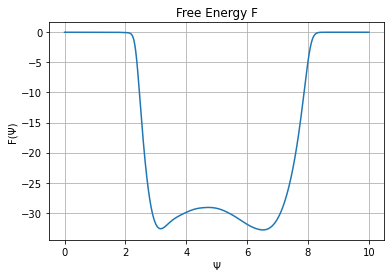

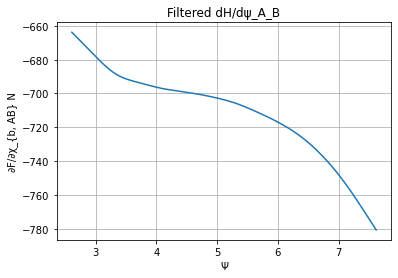

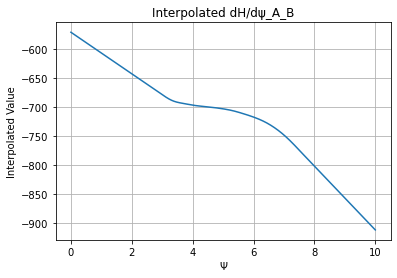

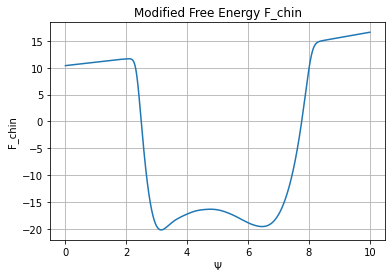

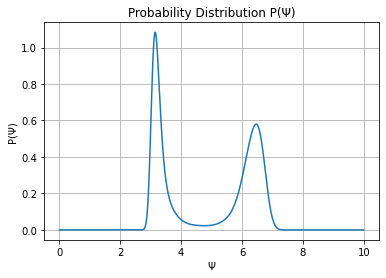

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

# Define constants
chin = 13.15
langevin_step = round(10.0 * 10**6)

# Load MATLAB data
filename = f"lam_{chin:05.2f}/data_simulation/wtmd_statistics_{langevin_step:06d}.mat"
data = loadmat(filename, squeeze_me=True)

# Extract variables from .mat file
psi_range = data['psi_range']
u = data['u']
I0 = data['I0']
dH_psi_A_B = data['dH_psi_A_B']
dT = data['dT']
dpsi = data['dpsi']

coeff = (1/dT + 1)

dchiN = -0.014
print(chin + dchiN)

bare_dchiN = dchiN / 0.7691138
bare_chiN = chin / 0.7691138

F = -u * coeff

# Plot F vs psi_range
plt.figure(1)
plt.plot(psi_range, F)
plt.title('Free Energy F')
plt.xlabel('Ψ')
plt.ylabel('F(Ψ)')
plt.grid(True)

# Normalize I0 and filter
plt.figure(2)
I0_norm = I0 / np.max(I0)
mask = I0_norm > 1e-1
x = psi_range[mask]
y = dH_psi_A_B[mask]
plt.plot(x, y)
plt.title('Filtered dH/dψ_A_B')
plt.xlabel('Ψ')
plt.ylabel('∂F/∂χ_{b, AB} N')
plt.grid(True)

# Interpolate to full psi_range
plt.figure(3)
interp_func = interp1d(x, y, kind='linear', fill_value='extrapolate')
y_interp = interp_func(psi_range)
plt.plot(psi_range, y_interp)
plt.title('Interpolated dH/dψ_A_B')
plt.xlabel('Ψ')
plt.ylabel('Interpolated Value')
plt.grid(True)

# Calculate F_chin and new probability distribution y
F_chin = F + y_interp * bare_dchiN
exp_u = np.exp(-F_chin)
y = exp_u / np.sum(exp_u) / dpsi

# Plot F_chin
plt.figure(4)
plt.plot(psi_range, F_chin)
plt.title('Modified Free Energy F_chin')
plt.xlabel('Ψ')
plt.ylabel('F_chin')
plt.grid(True)

# Find peaks in -y
peaks, _ = find_peaks(-y, prominence=0.01)

if len(peaks) > 0:
    area1 = np.sum(y[:peaks[0]])
    area2 = np.sum(y[peaks[0]:])
    total_area = area1 + area2
    print(f"Areas: [{area1}, {area2}]")
    print(f"Area Ratio (Second Peak): {area2 / total_area}")
else:
    print("No significant peaks found.")

# Plot probability distribution y
plt.figure(5)
plt.plot(psi_range, y)
plt.title('Probability Distribution P(Ψ)')
plt.xlabel('Ψ')
plt.ylabel('P(Ψ)')
plt.grid(True)

plt.show()